### Multiple walkers

It is possible to have multiple replicas of the neural network, each with its distinct parameter set.

This allows writing even more advanced sampling routines that may exchange information between walkers.

In [1]:
import sys
sys.path.insert(1, '/home/heber/packages/TATi-unstable/lib/python3.5/site-packages')


The essential option is `number_walkers`. If larger than 1, then we have multiple copies of the network.

In [12]:
import TATi.simulation as tati

nn = tati(batch_data_files=["dataset-twoclusters.csv"],
          friction_constant=1.,
          inverse_temperature=10.,
          learning_rate=0.1,
          loss="mean_squared",
          max_steps=100,
          number_walkers=2,
          output_activation="linear",
          sampler="BAOAB",
          seed=426,
          step_width=0.1)

Let us check that each have distinct parameter sets and start at different initially random positions.

In [13]:
print(nn.parameters)

[[0.045476913, 0.25929463, 0.1],[-0.027734637, 0.17336726, 0.1]]


As you see, `nn.parameters` suddenly returns a list with two entries, one per walker.

Moreover, we see that indeed each walker starts at a different position.

Let us sample and look at the trajectories.

In [16]:
sampling_data = nn.sample()

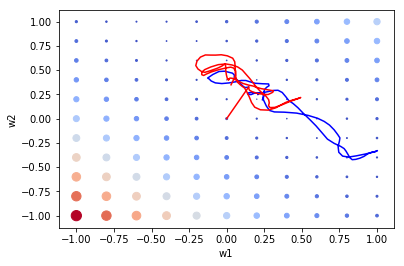

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# again use sampled grid as background
sampled_grid = np.loadtxt("loss-grid.csv", delimiter=",", skiprows=0)

# get trajectories as list of numpy arrays
trajectories = [sampling_data.trajectory[i][['weight0','weight1']].values for i in range(nn.get_options("number_walkers"))]

plt.scatter(sampled_grid[:,0], sampled_grid[:,1], c=sampled_grid[:,2], s=sampled_grid[:,2]*4, cmap=cm.coolwarm)
colors = ['b','r']
for i in range(nn.get_options("number_walkers")):
    plt.plot(trajectories[i][:,0], trajectories[i][:,1], colors[i])
plt.xlabel("w1")
plt.ylabel("w2")
plt.show()

### Summary

- `Simulation` supports multiple walkers easily through the options key `number_walkers`
- `parameters`, `loss()`, `gradients()` and reĺated objects becomes list with one entry per walker
